# An Analysis Into New York AirBnB's - Technical Report 

********
### Table of Contents -


** Note - Click To Access Desired Section 

* [Introduction](#intro)
* [Description of The Dataset](#desc)
* [Analysis of The Datase](#analy)
* [Exploratory Data Analysis](#eda)
* [Potential Data Science](#pds)
* [Conclusion](#conc) 

********

### Introduction <a class="anchor" id="intro"></a>

Completed By Project Group 21 - 

1. Amit Sarvate 100794129
2. Benjamin D. Fedoruk -- 100779076
3. Lexa Torrance -- 100754032
4. Ahad Abdul -- 100787992

The dataset at hand goes by the name 'New York City Airbnb Open Data'. Put short - the dataset contains records petaining to the many thousands of properties within New York City listed on the Airbnb website during the year 2019. 

The motivation behind the exploration of this particular dataset stems from the reemergence of international travel resuming as the world transitions back to a more 'normal' way of life after restrictions imposed during the COVID-19 pandemic are slowly, but surely, becoming more and more relaxed. 

Whether it be travelling for business or vacation, New York City has been one of the biggest destinations for travel within this world for many decades. The city sees millions of visitors per year - with visitors traveling for all sorts of purpose (whether for business or leisure), and from all corners of the world. These visitors (most likely) need some form of accommodations (hotel, hostel, house) while they stay for multiple. 

For this reason, by providing a data oriented analysis into the listing market of AirBnB properties within NYC, we can bring insight into which particular living accommodations best suit the needs of visitors, regarding both their current circumstances (travelling with family, single, income etc) as well as their purpose (places wanting to visit, purpose of trip). 

In particular going into the analysis of this dataset we have a few inquiries that we would like further explore using our techniques for data analysis and visualization. Some of these questions have been listed: 

1. Estimate the earning of each property based on the review number (we are aware of the limitation that not everyone who stays in an airbnb leaves a review and therefore earnings are more than they appear in actualality) 

2. On average do hosts tend to own property in a particular area of the city or do hosts with multiple listings spread their assets across the city?

3. Which neighborhoods communities have the highest propensity to host visitors (based on available listed AirBnB properties within community), which do not? 

4. How does the type of room of the average listed property within each of the boroughs change? (Which boroughs have more entire homes for a family available)

5. Does a properties distance from the city centre (downtown Manhattan) have an impact on the daily price rate?


Contributions - ### TODO 

********

###  Description of The Dataset <a class="anchor" id="desc"></a>

The specific name of the dataset is called 'New York City Airbnb Open Data' and was found on `kaggle.com`, uploaded by 'Dgomonov' in the year 2019. The original data can be sourced to a corperation by the name of 'Inside Airbnb' (`http://insideairbnb.com/about.html`), an organization driven to `"Provide data that quantifies the impact of short-term rentals on housing and residential communities; and also provides a platform to support advocacy for policies to protect our cities from the impacts of short-term rentals."` - as mentioned on their website. 

The dataset was collected from the Airbnb website (`airbnb.com`) inlcuding the yearly availability as well as the reviews for each listing. 

The dataset contains a plethora of different types of data associated with each of the  properties listed in New York City on the Airbnb website during 2019. For example, there is information about the hosts (owners) of the property, the type of living space the property is, and much more. Below is a list of the many attributes of this dataset:

-  *id* -- the unique numerical value given to each specific property to identify it from every other property 
-  *name* -- a short description of the property
-  *host_id* -- the unique numerical value given to each specific host (owner of property) to identify it from every other host
-  *host_name* -- the name(s) of the owner(s) of the property 
-  *neighbourhood_group* -- which specific new york borough the property is situated within (Queens, Manhattan, Staten Island, Brooklyn and The Bronx) 
-  *neighbourhood* -- which specific small neighbourhood/community within the borough the property is situated within 
-  *latitude* -- geographic coordinate that specifies the north–south position of a point on the Earth's surface
-  *longitude* -- geographic coordinate that specifies the east–west position of a point on the Earth's surface
-  *room_type* -- what type of space a listed property is (private room, shared room, entire house) 
- *price* -- the price per day rates in USD (US Dollae) that it costs to rent the property 
- *minimum_nights* -- the minimum amount of nights one is allowed to rent out the property
- *number_of_reviews* -- the total number of reviews made on the property from the entire time the property has been listed on AirBnB
- *last_review* -- the last date the property was given a review 
- *reviews_per_month* -- the number of reviews made on average each month of the property being listed on AirBnB
- *calculated_host_listings_count* -- the total number of listings the host of the property has on AirBnB
- *availability_365* -- how many days the property is available for throughout the year 


Source(s):

1. `Inside Airbnb. Adding data to the debate. (2015). Inside Airbnb. http://insideairbnb.com/about.html`

2. `Dgomonov. (2019). New York City Airbnb Open Data. Kaggle.com. https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data`

3. `NYCdata: Tourism. (n.d.). Www.baruch.cuny.edu. https://www.baruch.cuny.edu/nycdata/tourism/index.html`

********

### Analysis of The Dataset <a class="anchor" id="analy"></a>

In the code below, we are loading the data and creating a dataframe to contain the records of the dataset. Additionally we are importing the neccessary modules to read, clean and preform analysis and visualization on the dataset.

In [144]:
%pip install seaborn;

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [102]:
# Importing the neccessary modules into our workbook 
import pandas as pd
import matplotlib.pyplot as plt
import re 
import numpy as np
import scipy as sp

from itertools import cycle, islice

#import sys
#!{sys.executable} -m pip install seaborn

import seaborn as sns


# Reading in the dataset and storing it into df 
df = pd.read_csv("ny_air_bnb.csv")

This is a list of colour codes that depict that the different boroughs within the city. We have included it within this section as it is part of our prelimary setup before creating visualizations with our cleaned dataset. 

In [132]:
borough_palette = {'Bronx': 'b', 'Brooklyn': 'r', 'Manhattan': 'g', 'Staten Island': 'm', 'Queens': 'c'}

#### Before Cleaning The Dataset 

The code below gives the reader a quick view into some information about the dataset before cleaning. Make note of the number of non-null records within the `last_review` and `reviews_per_month` columns of the dataset. Also, make note of `host_id`. Given the dataset contains 48895 records originally, we can deduce that there are around 10,000 records containing null values, which we will want to clean.

In [133]:
# Printing the number of records within the dataset 
print(f'There are originally a total of {df.shape[0]} total records within this dataset\n\n')

# This is the information 
print(df.info())

There are originally a total of 38821 total records within this dataset


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 

#### Cleaning the Dataset 

During this stage, we are cleaning the dataset to allow us to more easily analyze the dataset. 

##### 1. Dropping Records With Null Values 

We will be removing any records that contain null values as records with null values make it harder for us as the analyists to come to conclusions. *Make note -* that by having to remove records within the dataset containing an attribute with a null value will lead in a loss of potentially a lot of valueable information and therefore we acknowledge from this limitation that any analysis we make might be skewed from the actual answer due to Airbnb cords having to be removed.  

In [134]:
# 1. Cleaning the dataset 
df = df.dropna()

##### 2. Checking for and dropping duplicate records 

We will then determine if there are any duplicate records which could potentially cause inaccuracies when creating visualizations such as countplots (ex - having the same record's attribute counted twice) - there were no duplicate records and this was communicate in the code

In [135]:
# 2. Determining whether there are duplicate records 
dup_count = len(df) - len(df.drop_duplicates())
print(f'There were {dup_count} duplicates in df')

df = df.drop_duplicates()

There were 0 duplicates in df


##### 3. Text normalization for `name` field 

We will then transform the `name` field containing breif descriptions of each property to lowercase to make the text more readable 

In [136]:
# 3. Text normalization for the name column (improving readability) 
df['name'] = df['name'].apply(lambda x : x.lower()) # converting the names to lowercase 

##### 4. Preprocessing Data (Creating new columns within the dataset) and Converting to `last_review` to DateTime 

Finally, we will convert the date of `last_reviewed` from string to datetime. We will then seperate the month and year of the last reviewed date into their own respective columns as we believe we will be needing these metrics for further analysis within the exploratory data analysis of this dataset. 

We will also be calculating the approximate gross earnings and monthly earnings of each property given the number of reviews left and the daily price rate of renting the property.

***Note - these are only estimates of the gross and monthly earnings since not everybody who stays at an airbnb ends up giving their room a review - therefore the earnings of the properties are possibly much higher than they appear within the dataset*** 

In [137]:
#4. Preprocess Date Column inot Month and Year columns 
df['last_review'] = pd.to_datetime(df['last_review'],errors='coerce')

df['last_review_month'] = df['last_review'].dt.month
df['last_review_year'] = df['last_review'].dt.year

# 5. Creating a columns with gross earnings and monthly earnings (based on number_of_reviews)
df['gross_earnings'] = df['price'] * df['number_of_reviews']
df['monthly_earnings'] = df['price'] * df['reviews_per_month']

#### Results of Cleaning The Dataset

As can be seen, we have lost approximately 10,000 records due to dropping the records containing null values. By doing this we may have lost some very valuable information and therefore this speaks about the quality of the dataset. In particular, after cleaning the dataset it appears to be the `last_review` and `number_of_reviews` to have been the bottleneck that caused the majority of records dropped during the cleaning process, meaning the quality of these two columns in particular were subpar. Given all other columns (except for `host_id` as well), all records contained non-null values for those columns and therefore the rest of the dataset was really good! 

In [138]:
print(df.info(),'\n\n\n')

df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  nu

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year,gross_earnings,monthly_earnings
0,2539,clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,10,2018,1341,31.29
1,2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5,2019,10125,85.50
3,3831,cozy entire floor of brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,7,2019,24030,412.96
4,5022,entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,11,2018,720,8.00
5,5099,large cozy 1 br apartment in midtown east,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,6,2019,14800,118.00


********

### Exploratory Data Analysis <a class="anchor" id="eda"></a>

Now that we have cleaned and preprocessed our dataset, there are a lot of different types of analysis that we can preform on the data to find out information about the Airbnb listing market within New York City. In particular, we would like to expand upon a few subtopics to provide insightful imformation about the market including - 

[comment]: <> (Analysing the options for visitors)
1. Taking a look at the market and providing insight pertaining to the best available options to cater to a wide variety of visitors based on their circumstances and reasonings behind coming to NYC  

[comment]: <> (Finance and investment analysis)
2. An analysis into the financial aspect of owning an Airbnb (Focusing on income across the city as well as price variations across neighbhorhoods) as well as providing potential investor insight into the best locations to build or host airbnbs 

We will also briefly examine several other key analyses using these data.

#### An Analysis Into Dataset For A Consumer's Perspective 

According to the Baruch College, New York City welcomed an estimated 65.1 million visitors within the year 2018 alone (Baruch College, n.d.). Visitors from all corners of the world come to New York City for a multitude of different reasons whether it be for business, vacation, or to visit friends and family. Keeping this in mind as well as the fact that visitors might be travelling alone or with a family, most people's needs for accommodation will vary. 

Below, a countplot displaying the number of available Airbnbs by 

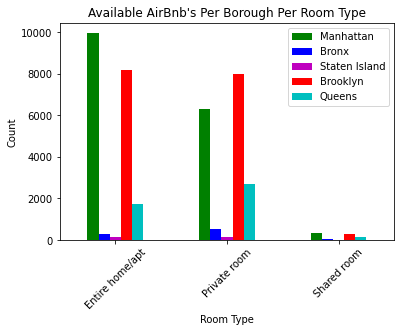

In [139]:
A = df[df['neighbourhood_group'] == 'Manhattan'].groupby('room_type').count()['id']
B = df[df['neighbourhood_group'] == 'Bronx'].groupby('room_type').count()['id']
C = df[df['neighbourhood_group'] == 'Staten Island'].groupby('room_type').count()['id']
D = df[df['neighbourhood_group'] == 'Brooklyn'].groupby('room_type').count()['id']
E = df[df['neighbourhood_group'] == 'Queens'].groupby('room_type').count()['id']
df_subbar = pd.DataFrame(np.c_[A,B,C,D,E], index=np.unique(df['room_type']))

my_colors = list(islice(cycle(['g', 'b', 'm', 'r', 'c']), None, len(df)))

df_subbar.plot.bar(color=my_colors);
plt.legend(labels=["Manhattan","Bronx", "Staten Island", "Brooklyn", "Queens"])

plt.xticks(rotation = 45);
plt.title("Available AirBnb's Per Borough Per Room Type")
plt.xlabel("Room Type")
plt.ylabel("Count");

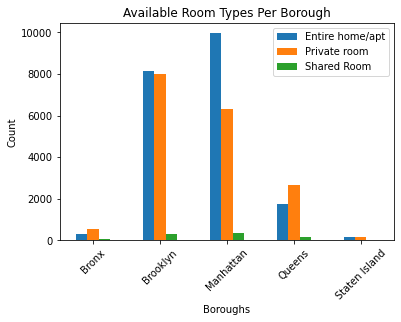

In [143]:
A = df[df['room_type'] == 'Entire home/apt'].groupby("neighbourhood_group").count()['id']
B = df[df['room_type'] == 'Private room'].groupby("neighbourhood_group").count()['id']
C = df[df['room_type'] == 'Shared room'].groupby("neighbourhood_group").count()['id']
df_subbar = pd.DataFrame(np.c_[A,B,C], index=np.unique(df['neighbourhood_group']))
df_subbar.plot.bar();

plt.legend(labels=['Entire home/apt', 'Private room', 'Shared Room'])


plt.xticks(rotation = 45);
plt.title("Available Room Types Per Borough")
plt.xlabel("Boroughs")
plt.ylabel("Count");

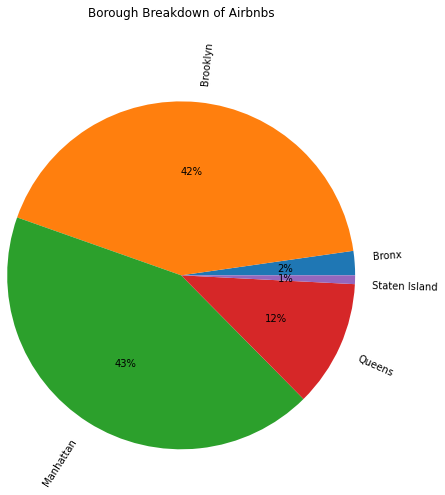

In [142]:
plt.pie(x=df.groupby('neighbourhood_group').count()['id'].values, labels=df.groupby("neighbourhood_group").count()['id'].index, autopct='%.0f%%', radius=2, rotatelabels=True)
plt.title("Borough Breakdown of Airbnbs", pad=150);

In [110]:
def plot_label_across_borough(borough: str, label: str, size: int=5):
    label_fmt = label.title().replace("_", " ")
    df_no_out = df_no_out = df[np.abs(sp.stats.zscore(df[label])) < 3]
    df_borough = df_no_out[df_no_out["neighbourhood_group"] == borough]
    sns.scatterplot(data=df_borough, x="longitude", y="latitude", s=size, hue=label, edgecolor="none")
    plt.title(f"{borough} Variance Across {label_fmt}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.legend(title=label_fmt)
    plt.show()

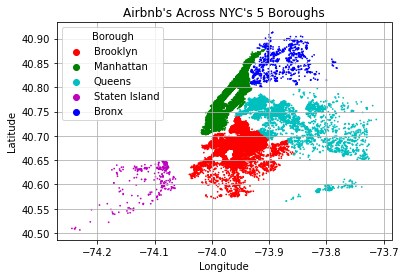

In [111]:
sns.scatterplot(data=df, y="latitude", x="longitude", hue="neighbourhood_group", s=3, edgecolor="none", palette=borough_palette)
plt.title("Airbnb's Across NYC's 5 Boroughs")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend(title="Borough");

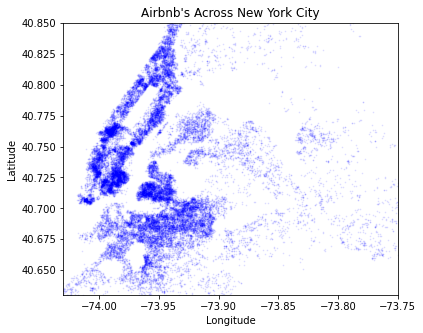

In [131]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
ax = plt.scatter(df['longitude'].values, df['latitude'].values, color='blue', s=0.5, label='train', alpha=0.1)
ax.axes.set_title("Airbnb's Across New York City")
ax.figure.set_size_inches(6,5)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.xlabel("Longitude")
plt.ylabel('Latitude')
plt.show()

#### An analysis for the financial and investors perspective 

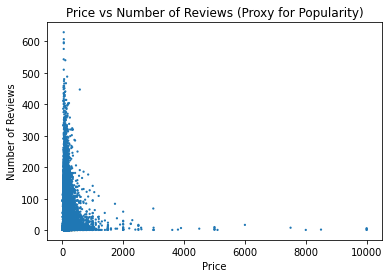

In [112]:
sns.scatterplot(data=df, x="price", y="number_of_reviews", s=5, edgecolor="none")
plt.title("Price vs Number of Reviews (Proxy for Popularity)")
plt.xlabel("Price")
plt.ylabel("Number of Reviews");

In [113]:
df.groupby("neighbourhood_group").size()

neighbourhood_group
Bronx              875
Brooklyn         16439
Manhattan        16621
Queens            4572
Staten Island      314
dtype: int64

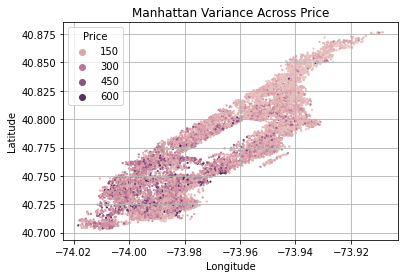

In [114]:
plot_label_across_borough("Manhattan", "price")

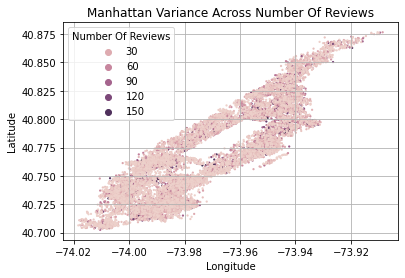

In [115]:
plot_label_across_borough('Manhattan', 'number_of_reviews')

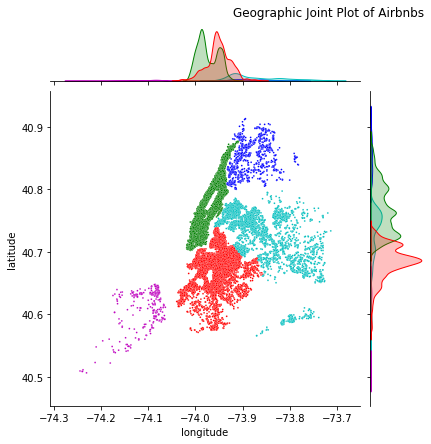

In [122]:
sns.jointplot(data=df, x="longitude", y="latitude", hue="neighbourhood_group", palette=borough_palette, s=3, legend=None)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Joint Plot of Airbnbs", pad=75, loc="right");

In the following two visualizations, we will display the average room price for each neighbourhood (within the 5 boroughs). The first visualization is a violin plot, which graphs a kernel density estimate (KDE) along with a box-and-whisker-style plot. The KDE visualizes the density of the data within the quartiles, while the box-and-whisker plot shows the median, first- and third-quartile, and the mean (denoted with a dot), as well as the outliers present in the data. 

The second visualization is a swarm plot. This plot does not include the data specifics -- it does not display the interquartile range, the median, or the mean. However, it does allow us to see the actual amount, with markers for each neighbourhood's average room price. It provides a sense of validation for the data, as a violin plot may appear accurate, but may have very sparse data, meaning that the violin plot is overfitted to the small amount of data. In our case, however, the swarm plot demonstrates that the violin plot fits well, and that there is enough data to properly use the metrics provided therein.

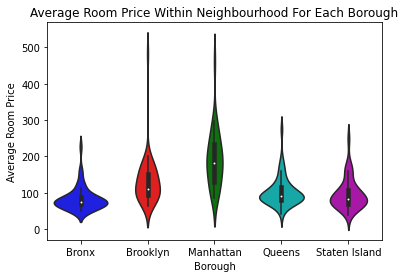

In [127]:
df_nbh = df.groupby(['neighbourhood_group', 'neighbourhood']).agg({'price': ['mean']})
df_nbh.columns = ['avg_price']
df_nbh = df_nbh.reset_index()
df_nbh

sns.violinplot(data=df_nbh, x='neighbourhood_group', y='avg_price', palette=borough_palette)
plt.xlabel("Borough")
plt.ylabel("Average Room Price")
plt.title("Average Room Price Within Neighbourhood For Each Borough");

/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


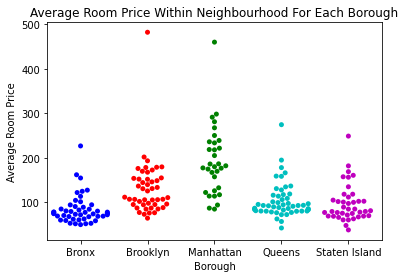

In [128]:
sns.swarmplot(data=df_nbh, x='neighbourhood_group', y='avg_price', palette=borough_palette, s=5, edgecolor="none")
plt.xlabel("Borough")
plt.ylabel("Average Room Price")
plt.title("Average Room Price Within Neighbourhood For Each Borough");

In [ ]:
# Pivot Table Showing The Variation (Rankings) of Net/Monthly Incomes Across Various Neighbhorhoods

*******

### Potential Data Science <a class="anchor" id="pds"></a>

There are numerous avenues for future analyses. Proper analysis of these data should include several techniques of data science, pertaining to clustering and various modelling techniques. If additional time data was given, specifically the date of establishment of each unit, we could continue to analyze whether established units provide higher profit for prospective Airbnb renters, or if the units in a certain neighborhood often trades hands (which may indicate that the market in that neighbourhood is unstable, raising caution to potential buyers). 

With time-of-establishment data, we could determine what areas are well-established, and what areas are rising in popularity. This would be critical for a buyer to know, if seeking to purchase an Airbnb property. 

Various modelling techniques should be employed on these data. We think that clustering would be an extremely advantageous tool to apply to this analysis. For instance, using k-means clustering would allow for unsupervised learning. We could also train a model using k-nearest neighbours or a support vector machine to determine what the optimal location would be to buy/establish a new Airbnb property in New York City. This model could possibly be applied to other large cities with similar layout to New York City, such as Toronto or Los Angeles. We believe that a k-nearest neighbors model of classification would be ideal to use when examining a specific densely-packed region (such as Manhattan), as it tends to work better on larger datasets with few outliers. However, if we were analyzing the entirety of New York City, it may be advantageous to employ a support vector machine model, as it would deal with outliers such as Staten Island, where Airbnb density is drastically different from packed areas such as Manhattan or Brooklyn.

Additionally, a random forest classifier may be an optimal method to model the large number of categorical labels present within the dataset (e.g. `room_type`, `neighbourhood_group`). 

Finally, it appears that the graph displayed herein, depicting a scatter plot of the price of an Airbnb against its number of reviews, approaches a rational function. It may be advantageous to determine the specific parameters for this curve (potentially using a logit curve), and then determining the inflection point. This would indicate two different classes of Airbnb pricing, which may provide a potential optimal price that Airbnb owners should charge to attract the greatest number of customers. This could be done using the `sklearn` and `sympy` modules in Python.

*******

### Conclusion <a class="anchor" id="conc"></a>